In [6]:
# DBSCAN  데이터의 밀도를 기반으로 군집을 형성
# 데이터가 붐비는 정도를 파악해서 복잡한 모양의 군집을 찾고 노이지를 구분
# 군집에 속하지 않는 데이터를 구분하는데 효과적

# 입실론  : 개별데이터를 기준으로 반경을 정의해서 그 안에 있는 데이터는 이웃
# 최소점 : 하나의 점이 밀집지역의 중심으로 인정받기위해 필요한 최소한의 이웃 데이터 개수(자신을 포함)

# 군집형성과정:
# 1. 핵심점(core point) : 반경 eps 안에 n_samples 개 이상의 점을 가진 점 
# 2. 경계점(Border point) : 핵심점은 아니지만 다른 핵심점의 반경  x1내에 위치한 점
# 3. 잡음은.. 어느 클러스터에도 속하지 않은 점  --> out lier  이상치

# 장점 : 군집개수가 불필요
# 데이터의 밀도가 다르기때문에 원형이 아니고 다양한 모양의 군집도 잘 찾
# 노이즈 식별이 잘됨

# 데이터의 분포 형태를 모를때, 노이즈가 많을거로 예상될때.... 상권 등...

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans

In [8]:
# 1. 초승달 모양의 샘플데이터 생성
X, y = make_moons (n_samples=200, noise=0.05, random_state=42)

In [9]:
# 2. 알고리즘 적용
# K-Means (군집 개수 k=2로 지정)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

In [10]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

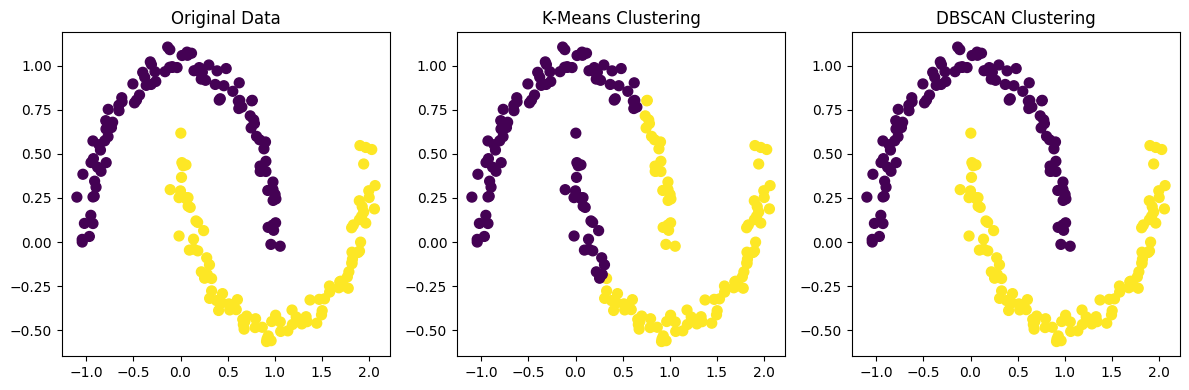

In [11]:
# X y 데이터 시각화
# 3. 시각화
plt.figure(figsize=(12, 4))

# 원본 데이터 시각화
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title('Original Data')

# K-Means 결과 시각화
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')

# DBSCAN 결과 시각화
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()